## IMPORTING LIBRARIES

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
np.random.seed(0)

## LOADING DATA

In [2]:
# Import the dataset from a CSV file named 'fetal_health.csv' into a Pandas DataFrame
# 'pd.read_csv' reads the CSV file into a tabular format, where rows represent data entries and columns represent features
data = pd.read_csv("fetal_health.csv")

# Display the first 5 rows of the DataFrame using the 'head()' function
# This gives a quick overview of the dataset structure and a preview of the first few entries
data.head(5)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
# 'info()' provides useful details about the dataset such as:
# - The number of rows (entries) and columns (features)
# - The name of each column
# - The data type of each column (e.g., int, float, object)
# - The number of non-null (non-missing) values in each column
# This helps in understanding the dataset's structure, data types, and completeness.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
# Check for missing values (null values) in the dataset
# 'isnull()' returns a DataFrame of the same shape as 'data', with True for null entries and False for non-null entries
# 'sum()' is then used to count the total number of missing values in each column
# This helps to quickly assess if any data cleaning is required due to missing values.
data.isnull().sum()


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

**No missing values in the dataset**

In [5]:

# Generate descriptive statistics for the numerical columns in the DataFrame
# 'describe()' provides summary statistics such as count, mean, standard deviation, min, 25th percentile, median (50th percentile), 75th percentile, and max for each numeric column
# '.T' transposes the result, switching rows and columns for better readability
# This gives a quick statistical overview of the dataset's distribution and can highlight potential outliers or anomalies.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


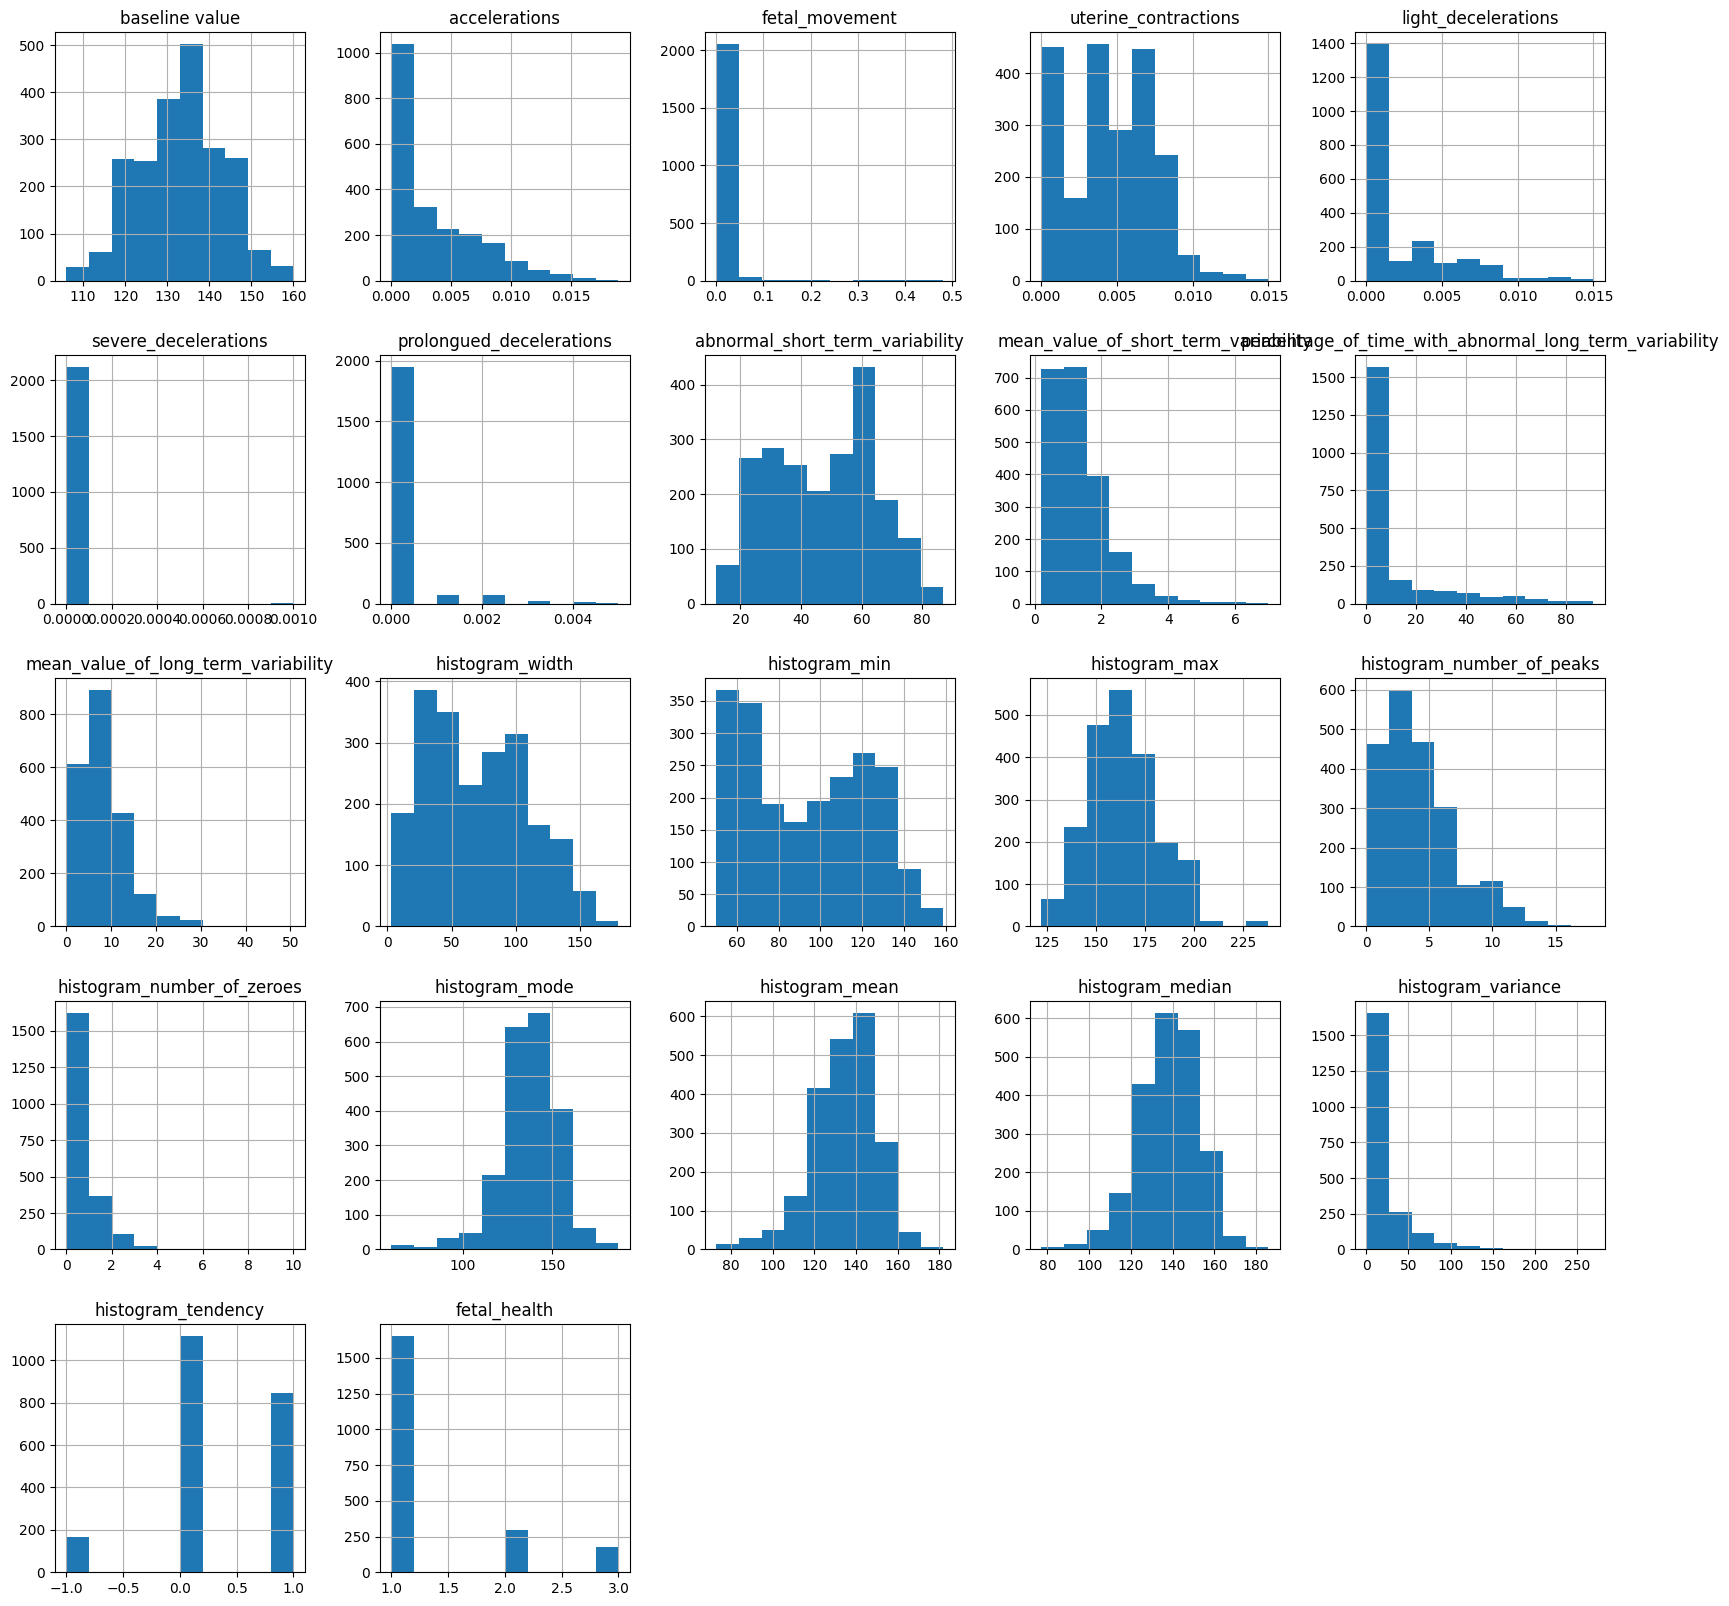

In [6]:
# Generate histograms for each numerical feature in the dataset
# 'hist()' creates a histogram for each numeric column, showing the distribution of values
# 'figsize=(20, 20)' specifies the size of the figure (width and height in inches) to ensure all histograms are properly spaced and readable
# This is useful for visualizing the distribution of each feature, detecting skewness, and identifying potential outliers.
hist_plot = data.hist(figsize=(20, 20))


* A lot of the attributes are skewed.

## Evaluating Target Vector (fetal_health)

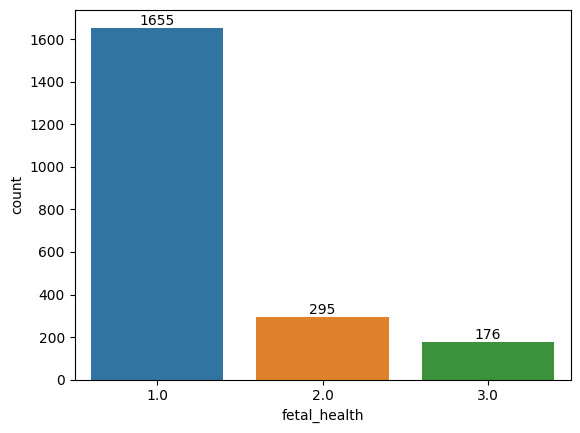

In [7]:
# Create a count plot for the 'fetal_health' column using Seaborn
# 'countplot()' visualizes the frequency of each category in the 'fetal_health' column, which contains categorical data representing the fetal health status
# 'data' specifies the DataFrame, and 'x' is the column to be plotted on the x-axis
# This plot shows how many instances belong to each health category (e.g., Normal, Suspect, Pathological).
plot1 = sns.countplot(data=data, x="fetal_health")

# Add labels to each bar in the count plot for better clarity
# 'bar_label()' annotates each bar with its corresponding value (count)
# 'container=plot1.containers[0]' ensures the labels are placed on the correct set of bars.
plot1.bar_label(container=plot1.containers[0])

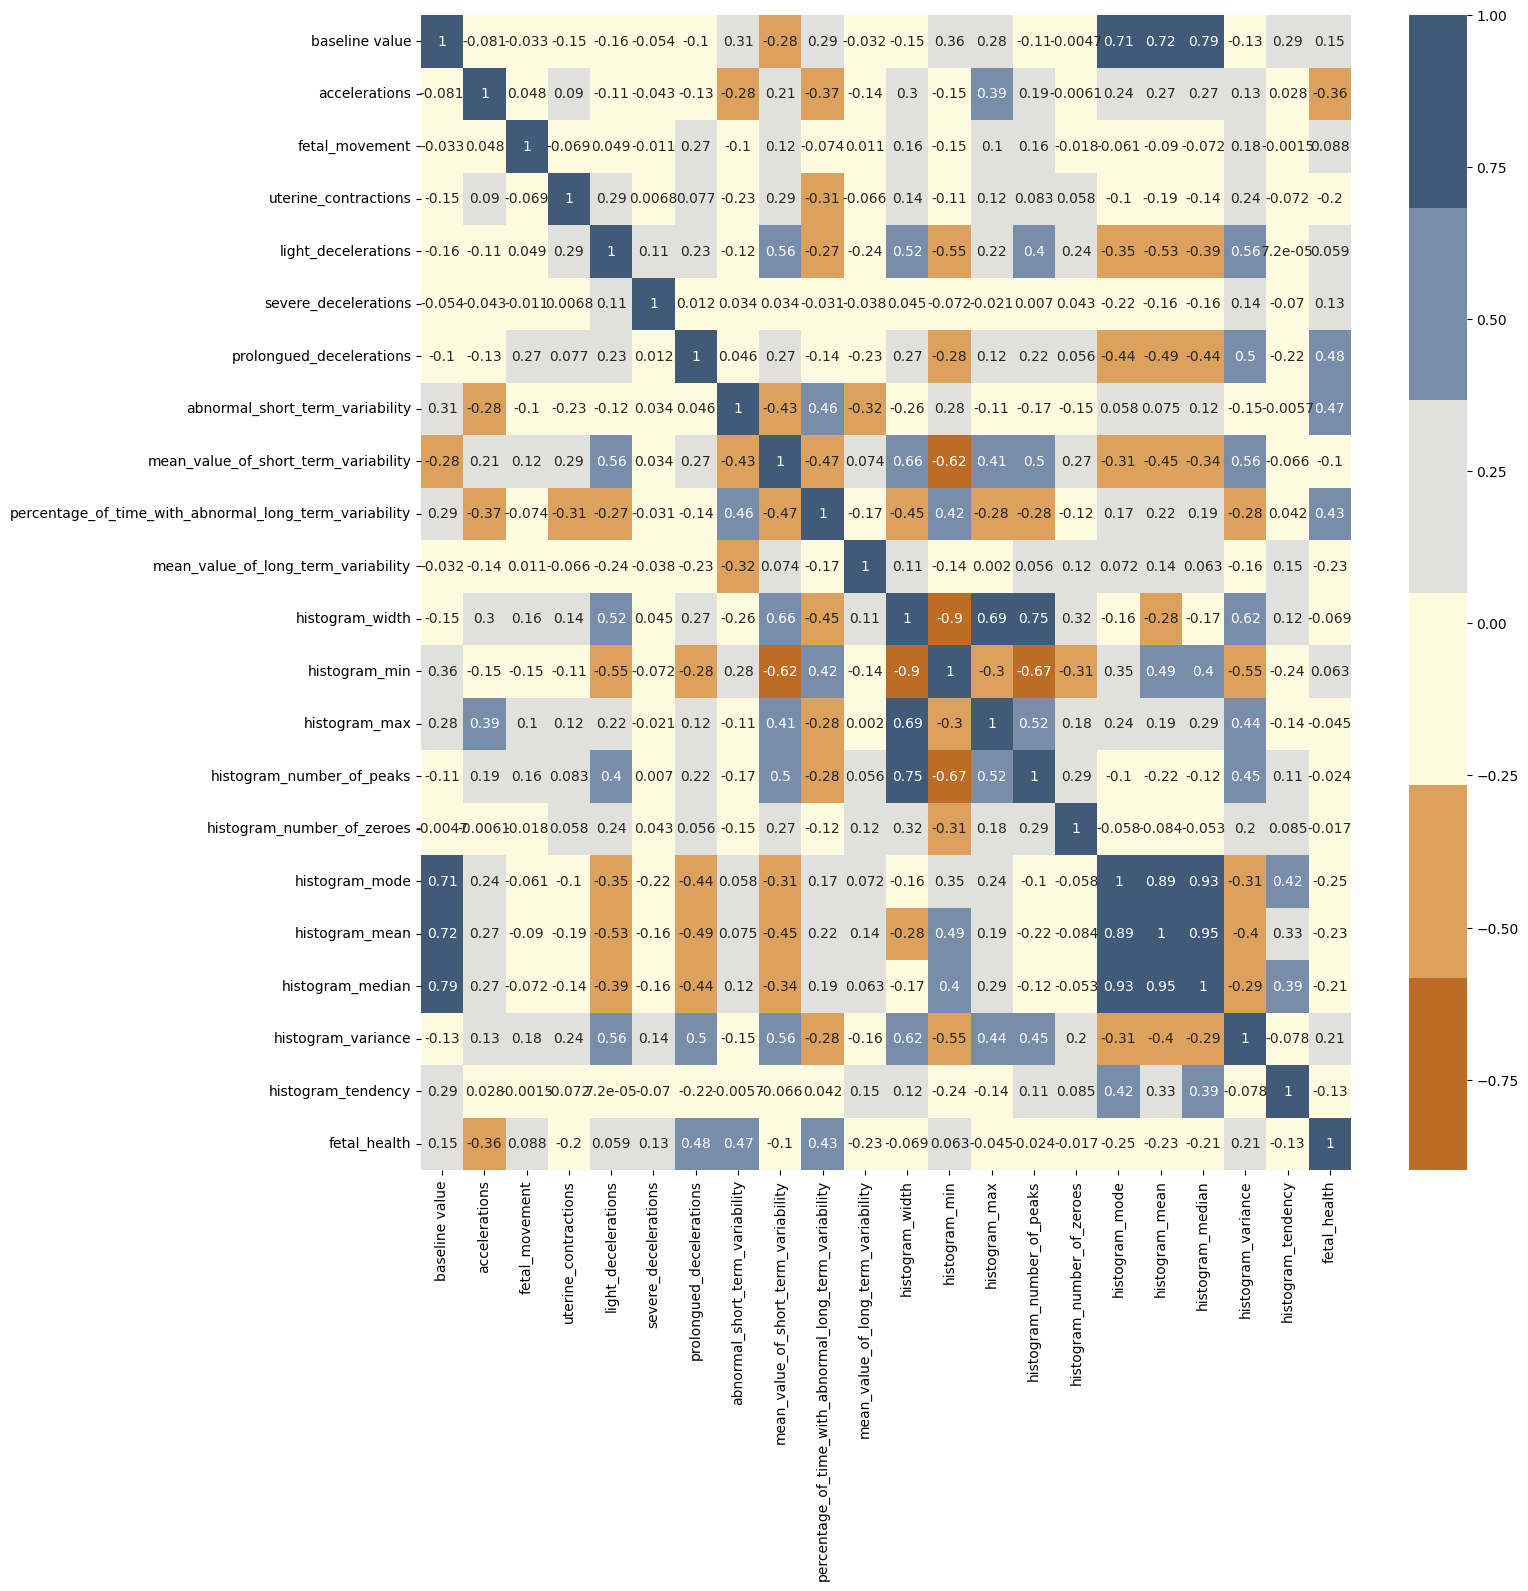

In [8]:
# Compute the correlation matrix of the dataset
# 'corr()' calculates the Pearson correlation coefficients between numerical columns in the DataFrame
# The correlation values range from -1 to 1, where:
#  1 indicates a perfect positive correlation
# -1 indicates a perfect negative correlation
#  0 indicates no correlation
corrmat = data.corr()

# Set the figure size for the heatmap to 15x15 inches to ensure it is large enough for easy viewing
plt.figure(figsize=(15, 15))

# Define a custom color palette for the heatmap
# 'cols' is a list of hex color codes used to style the heatmap (from dark brown to blue shades)
cols = ["#BC6C25", "#DDA15E", "#FEFAE0", "#E0E1DD", "#778DA9", "#415A77"]

# Create a heatmap using Seaborn to visualize the correlation matrix
# 'annot=True' displays the actual correlation values on the heatmap
# 'cmap=cols' applies the custom color palette for better visual distinction between different correlation values
sns.heatmap(corrmat, annot=True, cmap=cols)

In [9]:
# Separate the dataset into features (X) and target variable (y)
# 'data.drop(["fetal_health"], axis=1)' removes the 'fetal_health' column from the dataset to create the feature matrix (X)
# - 'axis=1' indicates that a column (not a row) is being dropped
# This creates the feature matrix 'X' containing all input variables used for predictions.
X = data.drop(["fetal_health"], axis=1)

# Assign the 'fetal_health' column to the target variable (y)
# 'fetal_health' is the column that contains the labels, i.e., the outcome we want to predict (Normal, Suspect, or Pathological)
y = data["fetal_health"]

In [10]:
# Split the data into training and testing sets
# 'train_test_split()' splits the feature matrix (X) and target variable (y) into training and testing subsets
# - 'test_size=0.2' specifies that 20% of the data will be allocated to the test set, while 80% will be used for training
# - 'random_state=42' ensures the split is reproducible, meaning the same split will occur every time the code is run
# This split is crucial for training the model on one portion of the data and evaluating it on another unseen portion to assess performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Calculate the Baseline Accuracy Score

In [11]:
# Calculate the baseline accuracy for the training set
# 'y_train.value_counts(normalize=True)' computes the distribution of target classes (fetal health categories) in y_train
# - Setting 'normalize=True' returns the relative frequencies (proportions) of each class
# 'max()' retrieves the highest proportion, representing the baseline accuracy
# Baseline accuracy indicates the accuracy of a model that always predicts the most frequent class, 
# serving as a simple reference point for comparing the performance of more complex models.
acc_baseline = y_train.value_counts(normalize=True).max()

# Print the baseline accuracy, rounded to two decimal places for clarity
print("Baseline Accuracy:", round(acc_baseline, 2))


Baseline Accuracy: 0.78


## Logistic Regression

In [12]:
# Create a pipeline that includes a Logistic Regression model
# 'make_pipeline()' constructs a pipeline, which sequentially applies a list of transformations followed by a final estimator
# Here, we use Logistic Regression with a maximum of 10,000 iterations to ensure convergence during training
model_lr = make_pipeline(
    LogisticRegression(max_iter=10000)
)

# Fit the logistic regression model to the training data
# 'fit()' trains the model using the feature matrix (X_train) and (y_train)
# This step adjusts the model parameters based on the training data to learn the relationship between features and target classes
model_lr.fit(X_train, y_train)


Pipeline(steps=[('logisticregression', LogisticRegression(max_iter=10000))])

**Evaluating the model**

In [13]:
# Calculate the accuracy of the logistic regression model on the training set
# 'model_lr.predict(X_train)' predicts the target values for the training features (X_train)
# 'accuracy_score()' compares the predicted values with the actual target values (y_train) to compute the accuracy
# Accuracy is the ratio of correctly predicted instances to the total instances in the dataset
acc_train = accuracy_score(y_train, model_lr.predict(X_train))

# Calculate the accuracy of the logistic regression model on the test set
# 'model_lr.predict(X_test)' predicts the target values for the test features (X_test)
# 'accuracy_score()' compares these predicted values with the actual target values (y_test) to compute the accuracy for the test set
acc_test = accuracy_score(y_test, model_lr.predict(X_test))

# Print the training accuracy, rounded to two decimal places for clarity
print("Training Accuracy:", round(acc_train, 2))

# Print the test accuracy, rounded to two decimal places for clarity
print("Test Accuracy:", round(acc_test, 2))


Training Accuracy: 0.88
Test Accuracy: 0.89


## Communicating Results

In [14]:
# Predict the class probabilities for the training set using the logistic regression model
# 'predict_proba()' returns the probabilities for each class for the input samples in X_train
# The output is a 2D array where each row corresponds to a sample and each column corresponds to a class
y_train_pred_proba = model_lr.predict_proba(X_train)

# Print the predicted probabilities for the first 5 samples in the training set
# This allows for a quick inspection of the model's confidence in its predictions
print(y_train_pred_proba[:5])


[[9.89173531e-01 1.07651300e-02 6.13394472e-05]
 [2.87123575e-01 6.95056735e-01 1.78196908e-02]
 [9.98615025e-01 1.36293043e-03 2.20447280e-05]
 [9.81761287e-01 1.82379795e-02 7.33070349e-07]
 [8.58996837e-01 1.40716679e-01 2.86483424e-04]]


### Features and Importances

In [15]:
# Get the logistic regression model from the pipeline
# 'named_steps' allows access to the individual steps in the pipeline by their names
# Here, we retrieve the logistic regression model to analyze its coefficients (importances)
logistic_regression = model_lr.named_steps['logisticregression']

# Retrieve the feature names from the training set
# 'list(X_train.columns)' converts the column names of the feature matrix (X_train) into a list
# This list will be used to associate feature importances with their respective names
features = list(X_train.columns)

# Get the coefficients (importances) of the logistic regression model
# 'coef_' contains the weights assigned to each feature by the logistic regression model
importances = logistic_regression.coef_[0]


In [16]:
# Calculate the feature importances by taking the exponential of the coefficients
# 'np.exp(importances)' applies the exponential function to each coefficient
# This transformation is useful because, in logistic regression, the coefficients represent log-odds
# Taking the exponent gives the odds ratios, making the importances easier to interpret in terms of relative influence
feat_imp = pd.Series(np.exp(importances), index=features).sort_values()

# Display the top feature importances
# 'head()' returns the first few entries (by default, 5) of the sorted feature importances
# This allows for a quick view of the most influential features in the model
feat_imp.head()


fetal_movement                         0.139693
histogram_tendency                     0.710431
baseline value                         0.825087
mean_value_of_long_term_variability    0.883436
abnormal_short_term_variability        0.926180
dtype: float64

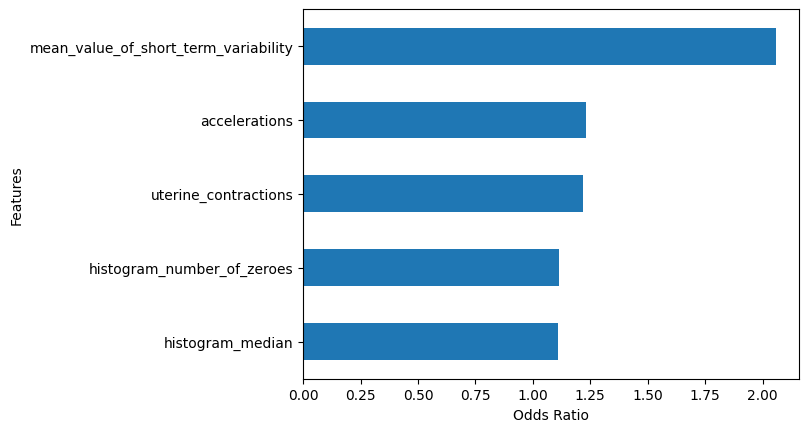

In [17]:
# Plot the least important features of the logistic regression model
# 'feat_imp.tail(5)' selects the bottom 5 features with the lowest odds ratios, indicating their relative insignificance
# 'plot(kind="barh")' creates a horizontal bar plot to visualize these features
# A horizontal bar plot is often easier to read when dealing with feature names, especially if they are long
feat_imp.tail(5).plot(kind="barh")

# Set the x-axis label to indicate that the values represent Odds Ratios
plt.xlabel('Odds Ratio')

# Set the y-axis label to indicate that these are the feature names
plt.ylabel('Features')


* This plot indicates the features with the odds most likely to cause fetal death.

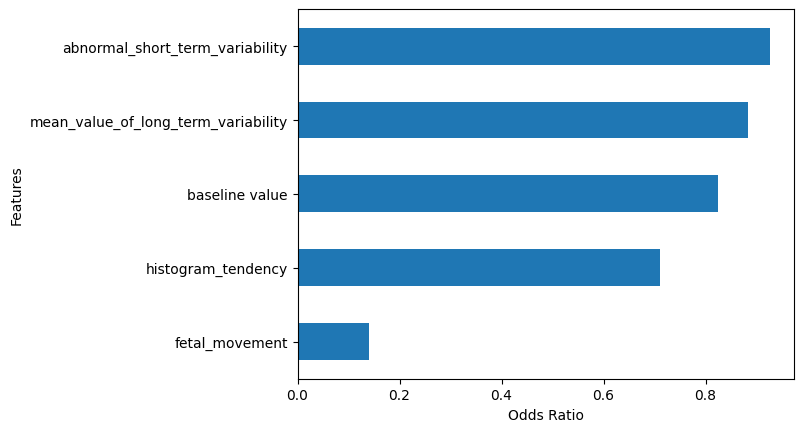

In [18]:
# Plot the most important features of the logistic regression model
# 'feat_imp.head(5)' selects the top 5 features with the highest odds ratios, indicating their relative significance in predicting the target variable
# 'plot(kind="barh")' creates a horizontal bar plot to visualize these features
# A horizontal bar plot is effective for displaying feature names clearly, especially if they are lengthy
feat_imp.head(5).plot(kind="barh")

# Set the x-axis label to indicate that the values represent Odds Ratios
plt.xlabel('Odds Ratio')

# Set the y-axis label to indicate that these are the feature names
plt.ylabel('Features')


* This plot indicates the features with the odds least likely to cause fetal death.

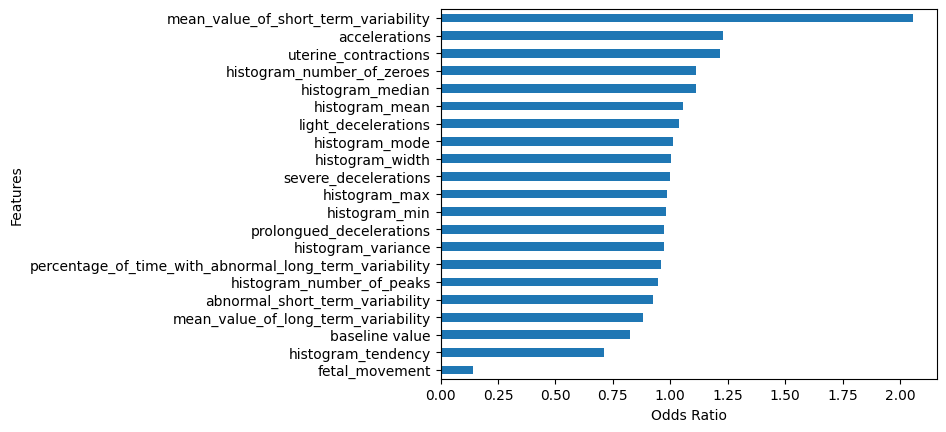

In [19]:
# Plot all feature importances of the logistic regression model
# 'feat_imp' contains the odds ratios for each feature, indicating their relative importance in predicting the target variable
# 'plot(kind="barh")' creates a horizontal bar plot to visualize all features' importances
# This allows for a comprehensive view of how each feature influences the model's predictions
feat_imp.plot(kind="barh")

# Set the x-axis label to indicate that the values represent Odds Ratios
plt.xlabel('Odds Ratio')

# Set the y-axis label to indicate that these are the feature names
plt.ylabel('Features')


* This plot indicates all features with their odds of likely causing fetal death.

## Decision Tree Classifier

In [20]:
# Create a pipeline that includes a Decision Tree Classifier
# 'make_pipeline()' constructs a pipeline, which allows for sequential application of transformations followed by an estimator
# Here, we use Decision Tree Classifier with a fixed random state for reproducibility
model_dt = make_pipeline(
    DecisionTreeClassifier(random_state=42)
)

# Fit the decision tree model to the training data
# 'fit()' trains the model using the feature matrix (X_train) and the target variable (y_train)
# This step optimizes the model's parameters based on the training data to learn the relationship between features and target classes
model_dt.fit(X_train, y_train)


Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [21]:
# Calculate the accuracy of the decision tree model on the training set
# 'model_dt.predict(X_train)' predicts the target values for the training features (X_train)
# 'accuracy_score()' compares the predicted values with the actual target values (y_train) to compute the accuracy
# Accuracy is the ratio of correctly predicted instances to the total instances in the dataset
acc_train_dt = accuracy_score(y_train, model_dt.predict(X_train))

# Calculate the accuracy of the decision tree model on the test set
# 'model_dt.predict(X_test)' predicts the target values for the test features (X_test)
# 'accuracy_score()' compares these predicted values with the actual target values (y_test) to compute the accuracy for the test set
acc_test_dt = accuracy_score(y_test, model_dt.predict(X_test))

# Print the training accuracy, rounded to two decimal places for clarity
print("Training Accuracy:", round(acc_train_dt, 2))

# Print the test accuracy, rounded to two decimal places for clarity
print("Test Accuracy:", round(acc_test_dt, 2))


Training Accuracy: 1.0
Test Accuracy: 0.92


* While the test accuracy of 92% is good, the perfect training accuracy suggests potential overfitting. Revising the hyperparameters and using cross-validation can help improve the model's performance and generalizability.

In [22]:
# Define the parameter grid for hyperparameter tuning of the Decision Tree Classifier
# 'param_grid' is a dictionary where keys represent the parameters to tune and values are lists of possible values to explore
# - 'max_depth': Controls the maximum depth of the tree (None means nodes are expanded until all leaves are pure or contain fewer than min_samples_split samples)
# - 'min_samples_split': Minimum number of samples required to split an internal node
# - 'min_samples_leaf': Minimum number of samples required to be at a leaf node
param_grid = {
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV for hyperparameter tuning
# 'GridSearchCV' searches through the specified hyperparameter grid to find the best combination of parameters based on cross-validation
# 'cv=5' specifies 5-fold cross-validation, where the training set is split into 5 parts for training and validation
# 'scoring='accuracy'' uses accuracy as the metric to evaluate model performance
# 'n_jobs=-1' allows the search to utilize all available CPU cores for parallel processing
grid_search_dt = GridSearchCV(model_dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search model to the training data
# This step performs the hyperparameter tuning by evaluating all combinations of parameters in the grid
grid_search_dt.fit(X_train, y_train)

# Retrieve the best hyperparameters found during the grid search
best_params_dt = grid_search_dt.best_params_

# Retrieve the best model that was found during the grid search
best_model_dt = grid_search_dt.best_estimator_

# Evaluate the best model on the test set and compute its accuracy
best_model_score_dt = accuracy_score(y_test, best_model_dt.predict(X_test))

# Print the test accuracy of the best model, rounded to two decimal places for clarity
print("Best Model Test Accuracy:", round(best_model_score_dt, 2))

Best Model Test Accuracy: 0.93


* The Best Model Test Accuracy of 93% indicates that the model generalizes well to new, unseen data, achieving high accuracy.

In [23]:
# Perform cross-validation to evaluate the model's performance on the training data
# 'cross_val_score()' computes the accuracy of the model using 5-fold cross-validation
# - 'model_dt' is the Decision Tree model to be evaluated
# - 'X_train' and 'y_train' are the feature matrix and target variable for the training data
# - 'cv=5' specifies that 5-fold cross-validation should be used
# - 'scoring='accuracy'' specifies that accuracy is the metric to evaluate the model
cv_scores = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='accuracy')

# Print the mean accuracy and the standard deviation of the cross-validation scores
# The mean gives an overall estimate of model performance, while the standard deviation indicates the variability across folds
# The standard deviation is multiplied by 2 to provide a 95% confidence interval for the mean accuracy
print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))


Cross-Validation Accuracy: 0.91 (+/- 0.02)


* The Cross-Validation Accuracy of 91% (+/- 0.02) demonstrates that the model's performance is robust and stable across different subsets of the training data.

* These scores collectively suggest that the decision tree classifier, after hyperparameter tuning and cross-validation, is performing effectively and reliably on the given dataset.

## Random Forest Classification

In [24]:
# Create a pipeline that includes a Random Forest Classifier
# 'make_pipeline()' constructs a pipeline for sequential application of transformations followed by an estimator
# In this case, we are using a Random Forest Classifier with a fixed random state for reproducibility
model_rf = make_pipeline(
    RandomForestClassifier(random_state=42)
)

# Fit the random forest model to the training data
# 'fit()' trains the model using the feature matrix (X_train) and the target variable (y_train)
# This step optimizes the model's parameters based on the training data to learn the relationship between features and target classes
model_rf.fit(X_train, y_train)


Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [25]:
# Calculate the accuracy of the random forest model on the training set
# 'model_rf.predict(X_train)' predicts the target values for the training features (X_train)
# 'accuracy_score()' compares the predicted values with the actual target values (y_train) to compute the accuracy
# Accuracy is the ratio of correctly predicted instances to the total instances in the training dataset
acc_train_rf = accuracy_score(y_train, model_rf.predict(X_train))

# Calculate the accuracy of the random forest model on the test set
# 'model_rf.predict(X_test)' predicts the target values for the test features (X_test)
# 'accuracy_score()' compares these predicted values with the actual target values (y_test) to compute the accuracy for the test set
acc_test_rf = accuracy_score(y_test, model_rf.predict(X_test))

# Print the training accuracy, rounded to two decimal places for clarity
print("Training Accuracy:", round(acc_train_rf, 2))

# Print the test accuracy, rounded to two decimal places for clarity
print("Test Accuracy:", round(acc_test_rf, 2))


Training Accuracy: 1.0
Test Accuracy: 0.95


* The training accuracy is 1.0, indicating perfect accuracy on the training set, which may suggest overfitting.
* The test accuracy is 0.95, which is high and suggests good performance on unseen data.

In [26]:
# Define the parameter grid for hyperparameter tuning of the Random Forest Classifier
# 'param_grid_rf' is a dictionary where keys represent the parameters to tune and values are lists of possible values to explore
# - 'n_estimators': The number of trees in the forest (more trees can improve performance but also increase computational cost)
# - 'max_depth': Controls the maximum depth of the trees (None means nodes are expanded until all leaves are pure or contain fewer than min_samples_split samples)
# - 'min_samples_split': Minimum number of samples required to split an internal node
# - 'min_samples_leaf': Minimum number of samples required to be at a leaf node
param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV for hyperparameter tuning
# 'GridSearchCV' searches through the specified hyperparameter grid to find the best combination of parameters based on cross-validation
# 'cv=5' specifies 5-fold cross-validation, where the training set is split into 5 parts for training and validation
# 'scoring='accuracy'' uses accuracy as the metric to evaluate model performance
# 'n_jobs=-1' allows the search to utilize all available CPU cores for parallel processing
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search model to the training data
# This step performs the hyperparameter tuning by evaluating all combinations of parameters in the grid
grid_search_rf.fit(X_train, y_train)

# Retrieve the best hyperparameters found during the grid search
best_params_rf = grid_search_rf.best_params_

# Retrieve the best model that was found during the grid search
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best model on the test set and compute its accuracy
best_model_score_rf = accuracy_score(y_test, best_model_rf.predict(X_test))

# Print the test accuracy of the best model, rounded to two decimal places for clarity
print("Best Model Test Accuracy:", round(best_model_score_rf, 2))


Best Model Test Accuracy: 0.95


* The best model test accuracy remains at 0.95, indicating that hyperparameter tuning did not significantly improve performance, but it did help confirm the robustness of the initial model.

In [27]:
# Perform cross-validation to evaluate the model's performance on the training data
# 'cross_val_score()' computes the accuracy of the model using 5-fold cross-validation
# - 'model_rf' is the Random Forest model to be evaluated
# - 'X_train' and 'y_train' are the feature matrix and target variable for the training data
# - 'cv=5' specifies that 5-fold cross-validation should be used
# - 'scoring='accuracy'' specifies that accuracy is the metric to evaluate the model
cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')

# Print the mean accuracy and the standard deviation of the cross-validation scores
# The mean provides an overall estimate of model performance, while the standard deviation indicates variability across folds
# The standard deviation is multiplied by 2 to provide a 95% confidence interval for the mean accuracy
print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores_rf.mean(), cv_scores_rf.std() * 2))


Cross-Validation Accuracy: 0.94 (+/- 0.02)


* The cross-validation accuracy is 0.94 with a small variability (+/- 0.02), indicating that the model performs consistently well across different subsets of the training data.

## Gradient Boosting Classification

In [28]:
# Create a pipeline that includes a Gradient Boosting Classifier
# 'make_pipeline()' constructs a pipeline for sequential application of transformations followed by an estimator
# In this case, we are using a Gradient Boosting Classifier with a fixed random state for reproducibility
model_gb = make_pipeline(
    GradientBoostingClassifier(random_state=42)
)

# Fit the gradient boosting model to the training data
# 'fit()' trains the model using the feature matrix (X_train) and the target variable (y_train)
# This step optimizes the model's parameters based on the training data to learn the relationship between features and target classes
model_gb.fit(X_train, y_train)


Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [29]:
# Calculate the accuracy of the gradient boosting model on the training set
# 'model_gb.predict(X_train)' predicts the target values for the training features (X_train)
# 'accuracy_score()' compares the predicted values with the actual target values (y_train) to compute the accuracy
# Accuracy is the ratio of correctly predicted instances to the total instances in the training dataset
acc_train_gb = accuracy_score(y_train, model_gb.predict(X_train))

# Calculate the accuracy of the gradient boosting model on the test set
# 'model_gb.predict(X_test)' predicts the target values for the test features (X_test)
# 'accuracy_score()' compares these predicted values with the actual target values (y_test) to compute the accuracy for the test set
acc_test_gb = accuracy_score(y_test, model_gb.predict(X_test))

# Print the training accuracy, rounded to two decimal places for clarity
print("Training Accuracy:", round(acc_train_gb, 2))

# Print the test accuracy, rounded to two decimal places for clarity
print("Test Accuracy:", round(acc_test_gb, 2))


Training Accuracy: 0.99
Test Accuracy: 0.95


* The training accuracy is 0.99, indicating very high accuracy on the training set, which suggests potential overfitting.
* The test accuracy is 0.95, indicating good performance on unseen data but slightly lower than the training accuracy, which suggests overfitting but still good generalization.

In [30]:
# Define the parameter grid for RandomizedSearchCV
# 'param_distributions_gb' is a dictionary where keys represent the hyperparameters to tune and values are lists of possible values to explore
# - 'n_estimators': The number of boosting stages to be run (more estimators can improve performance but also increase computational cost)
# - 'learning_rate': Determines the contribution of each tree (lower values require more trees to maintain performance)
# - 'max_depth': The maximum depth of the individual regression estimators (controls overfitting)
# - 'min_samples_split': The minimum number of samples required to split an internal node
# - 'min_samples_leaf': The minimum number of samples required to be at a leaf node
param_distributions_gb = {
    'gradientboostingclassifier__n_estimators': [100, 200, 300],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [3, 5, 7],
    'gradientboostingclassifier__min_samples_split': [2, 5, 10],
    'gradientboostingclassifier__min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV for hyperparameter tuning
# 'RandomizedSearchCV' samples a fixed number of parameter settings from the specified distributions to find the best combination of parameters
# - 'n_iter=50' specifies the number of different combinations to sample
# - 'cv=5' specifies 5-fold cross-validation to evaluate model performance for each combination
# - 'scoring='accuracy'' uses accuracy as the metric to evaluate model performance
# - 'n_jobs=-1' allows the search to utilize all available CPU cores for parallel processing
# - 'random_state=42' ensures reproducibility of the results
random_search_gb = RandomizedSearchCV(
    model_gb, 
    param_distributions=param_distributions_gb, 
    n_iter=50,  
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    random_state=42
)

# Perform the randomized search
# This step evaluates the specified parameter settings on the training data to identify the best-performing configuration
random_search_gb.fit(X_train, y_train)

# Retrieve the best hyperparameters found during the randomized search
best_params_gb = random_search_gb.best_params_

# Retrieve the best model that was found during the randomized search
best_model_gb = random_search_gb.best_estimator_

# Evaluate the best model on the test set and compute its accuracy
best_model_score_gb = accuracy_score(y_test, best_model_gb.predict(X_test))

# Print the test accuracy of the best model, rounded to two decimal places for clarity
print("Best Model Test Accuracy:", round(best_model_score_gb, 2))


Best Model Test Accuracy: 0.96


* The best model test accuracy is 0.96, indicating a slight improvement after hyperparameter tuning.

In [31]:
# Perform cross-validation to evaluate the performance of the best gradient boosting model
# 'cross_val_score()' computes the accuracy of the model using 5-fold cross-validation
# - 'best_model_gb' is the best gradient boosting model identified through hyperparameter tuning
# - 'X_train' and 'y_train' are the feature matrix and target variable for the training data
# - 'cv=5' specifies that 5-fold cross-validation should be used
# - 'scoring='accuracy'' specifies that accuracy is the metric used to evaluate the model's performance
cv_scores_gb = cross_val_score(best_model_gb, X_train, y_train, cv=5, scoring='accuracy')

# Print the mean accuracy and the standard deviation of the cross-validation scores
# The mean accuracy provides an overall estimate of model performance, while the standard deviation indicates variability across the different folds
# The standard deviation is multiplied by 2 to provide a rough estimate of the 95% confidence interval for the mean accuracy
print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores_gb.mean(), cv_scores_gb.std() * 2))


Cross-Validation Accuracy: 0.95 (+/- 0.02)


* The cross-validation accuracy is 0.95 with a small variability (+/- 0.02), indicating that the model performs consistently well across different subsets of the training data.

## Model Selection

In [32]:
# List of model names for identification
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

# Calculate the test accuracy for each model using the 'score()' method
# Each model's accuracy on the test set (X_test, y_test) is computed and stored in the 'test_scores' list
test_scores = [model_lr.score(X_test, y_test),  # Accuracy for Logistic Regression
               model_dt.score(X_test, y_test),  # Accuracy for Decision Tree
               model_rf.score(X_test, y_test),  # Accuracy for Random Forest
               model_gb.score(X_test, y_test)]  # Accuracy for Gradient Boosting

# Create a DataFrame to organize model performance results
# 'pd.DataFrame()' constructs a DataFrame with model names and their corresponding test accuracies
results_test = pd.DataFrame({
    "Model": model_names,      # Column for model names
    "Test Accuracy": test_scores  # Column for test accuracies
})

# Sort the DataFrame by the 'Test Accuracy' column in descending order
# This allows for easy identification of the best-performing models based on accuracy
results_test = results_test.sort_values(by="Test Accuracy", ascending=False)

# Set 'Test Accuracy' as the index of the DataFrame for better readability in the output
results_test = results_test.set_index("Test Accuracy")

# Display the DataFrame with the sorted model performance results
# This shows which models performed the best on the test data based on accuracy
results_test


,Model
Test Accuracy,
0.948357,Gradient Boosting
0.946009,Random Forest
0.922535,Decision Tree
0.894366,Logistic Regression


The test accuracy results for the models show that Gradient Boosting achieved the highest performance with approximately 94.84%, followed closely by Random Forest at 94.60%. Decision Tree performed slightly lower with an accuracy of about 92.25%, while Logistic Regression had the lowest accuracy at 89.20%. These findings indicate that ensemble methods like Gradient Boosting and Random Forest are well-suited for the dataset, demonstrating strong predictive power on unseen data compared to simpler models like Decision Tree and Logistic Regression.